In [73]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# traigo mis funciones
import sys

sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.soporte_preprocesamiento as sp

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 7\\datos\\online_shoppers_intention_clase_nonulls_estan.csv', index_col=0)
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative_knn,ProductRelated_knn,BounceRates_knn
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,-0.263158,-0.566667,11.461524
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,-0.263158,-0.533333,-0.221550
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,Returning_Visitor,-0.263158,-0.566667,-0.221550
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,SMT,Returning_Visitor,-0.052632,-0.533333,2.699218
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,Feb,Linux,Tor,Region1,SMT,Returning_Visitor,-0.263158,-0.266667,0.946757


In [75]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,11.461524
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,-0.263158,-0.533333,-0.221550
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,-0.221550
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,-0.052632,-0.533333,2.699218
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,-0.263158,-0.266667,0.946757


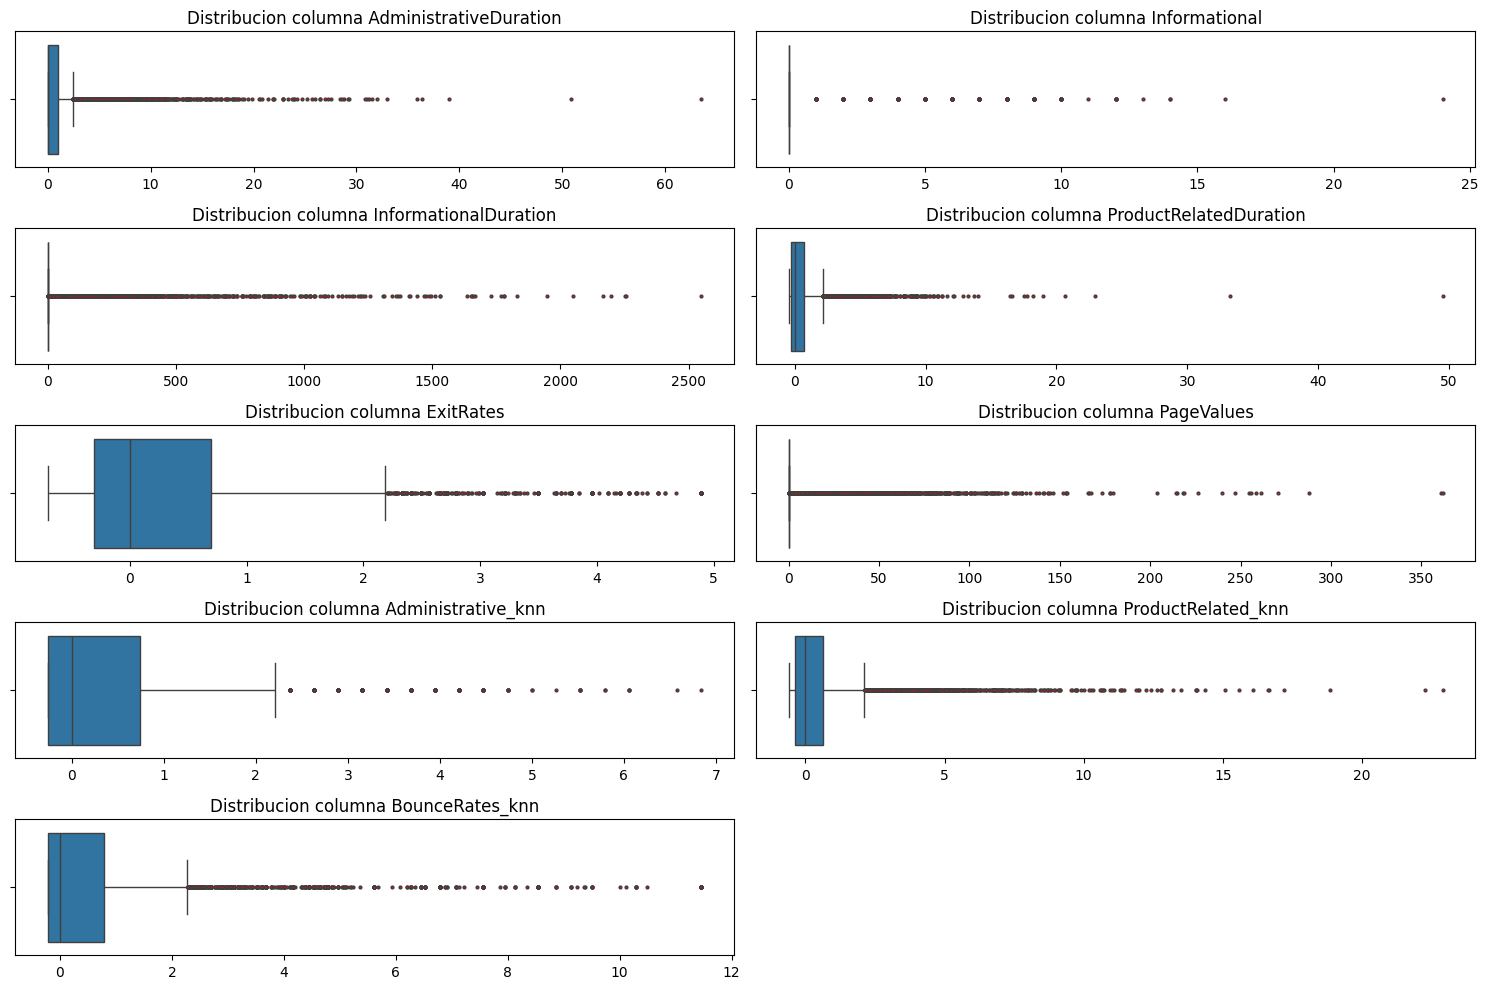

In [76]:
# def plot_outliers_univariados(dataframe, columnas_numericas, tipo_grafica, bins, whis):
#     fig, axes = plt.subplots(nrows=math.ceil(len(columnas_numericas) / 2), ncols=2, figsize= (15,10))

#     axes = axes.flat

#     for indice,columna in enumerate(columnas_numericas):

#         if tipo_grafica.lower() == 'h':
#             sns.histplot(x=columna, data=dataframe, ax= axes[indice], bins= bins)

#         elif tipo_grafica.lower() == 'b':
#             sns.boxplot(x=columna, 
#                         data=dataframe, 
#                         ax=axes[indice], 
#                         whis=whis, #para bigotes
#                         flierprops = {'markersize': 2, 'markerfacecolor': 'red'})
#         else:
#             print('No has elegido grafica correcta')
    
#         axes[indice].set_title(f'Distribucion columna {columna}')
#         axes[indice].set_xlabel('')

#     if len(columnas_numericas) % 2 != 0:
#         fig.delaxes(axes[-1])
#     plt.tight_layout()

cols_numericas = df.select_dtypes(include=np.number).columns
sp.plot_outliers_univariados(df, cols_numericas, 'b', 50)

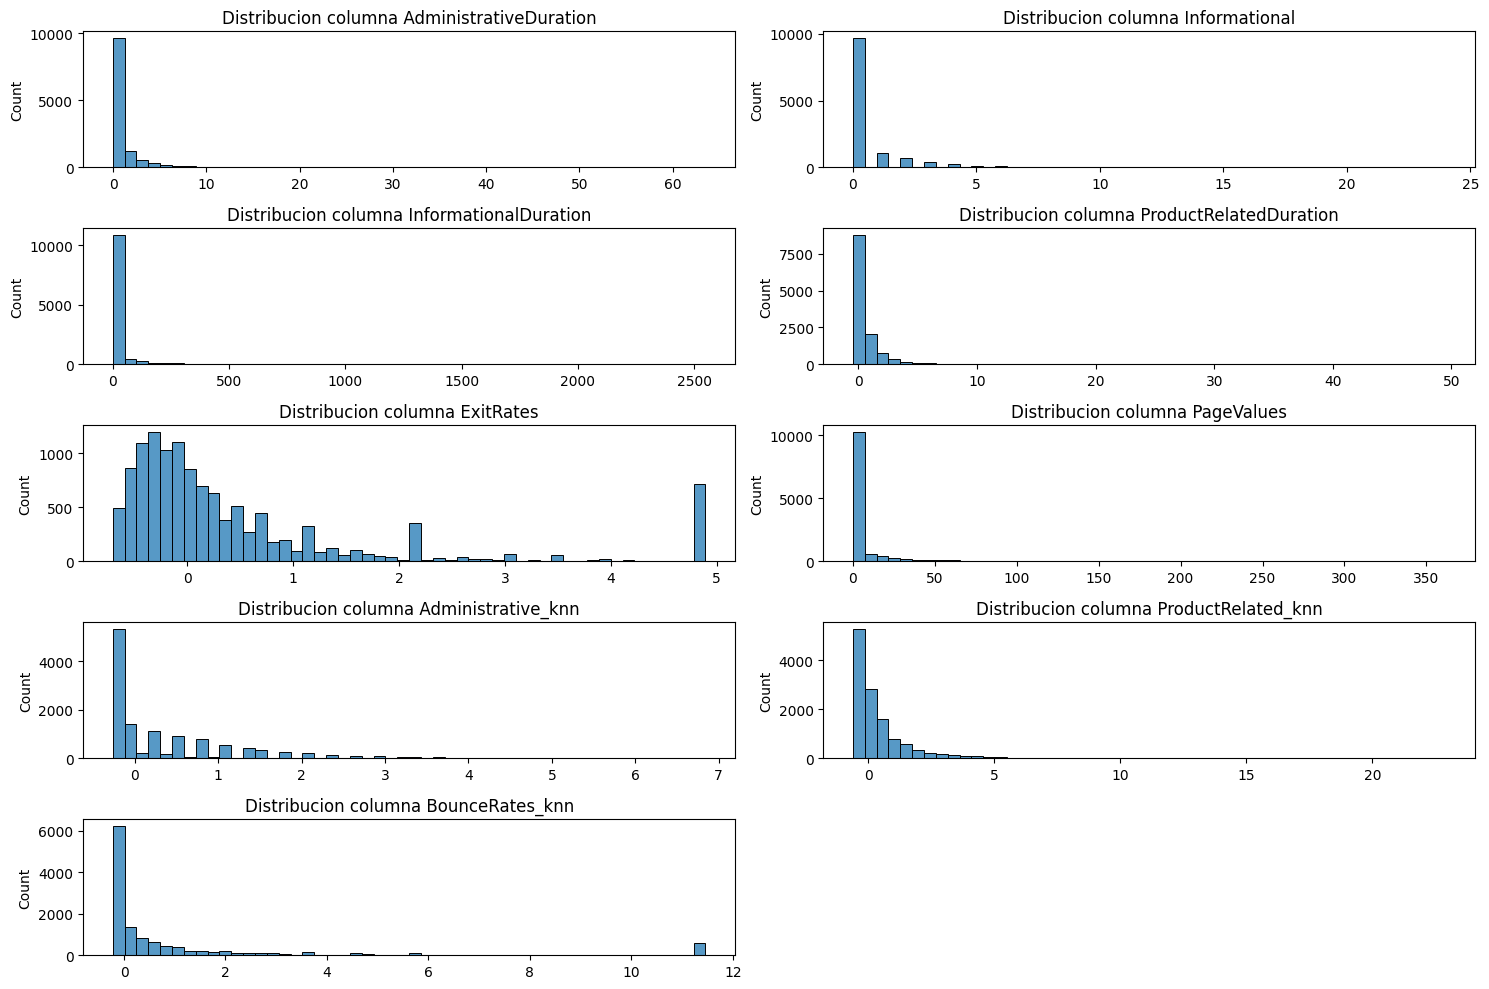

In [77]:
sp.plot_outliers_univariados(df, cols_numericas, 'h', 50)

In [78]:
# def identificar_outliers_iqr(dataframe,columnas_numericas ,k =1.5):
#     diccionario_outliers = {}
#     for columna in columnas_numericas:
#         Q1, Q3 = np.nanpercentile(dataframe[columna], (25,75)) #esta no da problemas con nulos
#         iqr = Q3 -Q1

#         limite_superior = Q3 + (iqr * k)
#         limite_inferior = Q1 - (iqr * k)

#         condicion_superior = dataframe[columna] > limite_superior
#         condicion_inferior = dataframe[columna] < limite_inferior

#         df_outliers = dataframe[condicion_superior | condicion_inferior]
#         print(f'La columna {columna.upper()} tiene {df_outliers.shape[0]} outliers')
#         if not df_outliers.empty: #hacemos esta condicion por si acaso mi columna no tiene outliers
#             diccionario_outliers[columna] = df_outliers

#     return diccionario_outliers

diccionario_resultados_outliers = sp.identificar_outliers_iqr(df, cols_numericas)

La columna ADMINISTRATIVEDURATION tiene 1450 outliers
La columna INFORMATIONAL tiene 2631 outliers
La columna INFORMATIONALDURATION tiene 2405 outliers
La columna PRODUCTRELATEDDURATION tiene 961 outliers
La columna EXITRATES tiene 1099 outliers
La columna PAGEVALUES tiene 2730 outliers
La columna ADMINISTRATIVE_KNN tiene 504 outliers
La columna PRODUCTRELATED_KNN tiene 979 outliers
La columna BOUNCERATES_KNN tiene 1600 outliers


In [79]:
diccionario_resultados_outliers['AdministrativeDuration'].head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative_knn,ProductRelated_knn,BounceRates_knn
109,6.072193,4.0,94.0,3.486881,-0.202662,0.0,Feb,Windows,Microsoft Edge,Region1,RT,Returning_Visitor,1.315789,0.440000,0.317526
128,8.610762,0.0,0.0,0.995516,-0.493059,0.0,Feb,Windows,Google Chrome,Unknown,RT,Returning_Visitor,0.789474,1.100000,-0.221550
191,22.897812,5.0,3.0,2.055682,1.983621,0.0,Mar,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.526316,0.200000,1.892530
202,4.047882,0.0,0.0,-0.245650,-0.587713,0.0,Mar,MacOS,Mozilla Firefox,Region1,OT,New_Visitor,0.736842,-0.166667,-0.221550
205,5.226003,0.0,0.0,-0.113426,-0.557011,0.0,Mar,Windows,Google Chrome,Region5,OT,New_Visitor,0.526316,-0.066667,-0.221550


In [80]:
condicion_z = abs(zscore(df['ExitRates']) >= 3)
condicion_z.sum()

713

In [81]:
df[condicion_z]

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative_knn,ProductRelated_knn,BounceRates_knn
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,-0.263158,-0.566667,11.461524
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,Returning_Visitor,-0.263158,-0.566667,-0.221550
6,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,Windows,Safari,Unknown,RT,Returning_Visitor,-0.263158,-0.566667,11.461524
7,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Google Chrome,Region1,CMCT,Returning_Visitor,0.000000,-0.600000,11.461524
16,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region4,RT,Returning_Visitor,-0.263158,-0.493333,11.461524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Nov,Linux,Google Chrome,Unknown,PST,Returning_Visitor,-0.263158,-0.500000,11.461524
12200,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Dec,Windows,Google Chrome,Region6,DT,Returning_Visitor,-0.263158,-0.566667,11.461524
12220,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Nov,Windows,Microsoft Edge,Region1,OT,Returning_Visitor,-0.263158,-0.533333,11.461524
12301,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Nov,MacOS,Mozilla Firefox,Unknown,DT,Returning_Visitor,-0.263158,-0.533333,11.461524


In [82]:
def identificar_outliers_z(dataframe, lista_columnas_numericas, limite_desviaciones =3):
    diccionario_outliers = {}
    for columna in lista_columnas_numericas:
        condicion_zscore = abs(zscore(dataframe[columna])) >= limite_desviaciones
        df_outliers = dataframe[condicion_zscore]

        print(f"La cantidad de outliers para la columna {columna.upper()} es {df_outliers.shape[0]}")

        if not df_outliers.empty:
            diccionario_outliers[columna] = df_outliers
    
    return diccionario_outliers

diccionario_outliers_z = identificar_outliers_z(df, cols_numericas)
diccionario_outliers_z.keys()

La cantidad de outliers para la columna ADMINISTRATIVEDURATION es 216
La cantidad de outliers para la columna INFORMATIONAL es 260
La cantidad de outliers para la columna INFORMATIONALDURATION es 230
La cantidad de outliers para la columna PRODUCTRELATEDDURATION es 219
La cantidad de outliers para la columna EXITRATES es 713
La cantidad de outliers para la columna PAGEVALUES es 259
La cantidad de outliers para la columna ADMINISTRATIVE_KNN es 267
La cantidad de outliers para la columna PRODUCTRELATED_KNN es 231
La cantidad de outliers para la columna BOUNCERATES_KNN es 614


dict_keys(['AdministrativeDuration', 'Informational', 'InformationalDuration', 'ProductRelatedDuration', 'ExitRates', 'PageValues', 'Administrative_knn', 'ProductRelated_knn', 'BounceRates_knn'])

In [83]:
import multiprocessing
multiprocessing.cpu_count()

8

In [84]:
cols_numericas

Index(['AdministrativeDuration', 'Informational', 'InformationalDuration',
       'ProductRelatedDuration', 'ExitRates', 'PageValues',
       'Administrative_knn', 'ProductRelated_knn', 'BounceRates_knn'],
      dtype='object')

In [92]:
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 500]

combinaciones = list(product(contaminacion, estimadores))
combinaciones

[(0.01, 10),
 (0.01, 100),
 (0.01, 500),
 (0.05, 10),
 (0.05, 100),
 (0.05, 500),
 (0.1, 10),
 (0.1, 100),
 (0.1, 500)]

In [86]:
for cont, esti in combinaciones:
    ifo = IsolationForest(random_state=42, #semilla de datos aleatorios
                        n_estimators=esti, #numero de arboles
                        contamination=cont,
                        n_jobs=-1) #nucleos del ordenador

    df[f'outliers_ifo_{cont}_{esti}'] = ifo.fit_predict(df[['PageValues', 'AdministrativeDuration', 'Informational']])

In [87]:
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,...,BounceRates_knn,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,...,11.461524,1,1,1,1,1,1,1,1,1
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,Feb,Windows,Google Chrome,Region1,...,-0.221550,1,1,1,1,1,1,1,1,1
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,...,-0.221550,1,1,1,1,1,1,1,1,1
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,...,2.699218,1,1,1,1,1,1,1,1,1
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,Feb,Linux,Tor,Region1,...,0.946757,1,1,1,1,1,1,1,1,1


In [88]:
df['outliers_ifo_0.01_10'].value_counts(normalize=True) #para verificar los porcentajes

outliers_ifo_0.01_10
 1    0.990511
-1    0.009489
Name: proportion, dtype: float64

In [89]:
columnas_hue = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [90]:
columnas_hue

Index(['outliers_ifo_0.01_10', 'outliers_ifo_0.01_100',
       'outliers_ifo_0.01_200', 'outliers_ifo_0.05_10',
       'outliers_ifo_0.05_100', 'outliers_ifo_0.05_200', 'outliers_ifo_0.1_10',
       'outliers_ifo_0.1_100', 'outliers_ifo_0.1_200'],
      dtype='object')

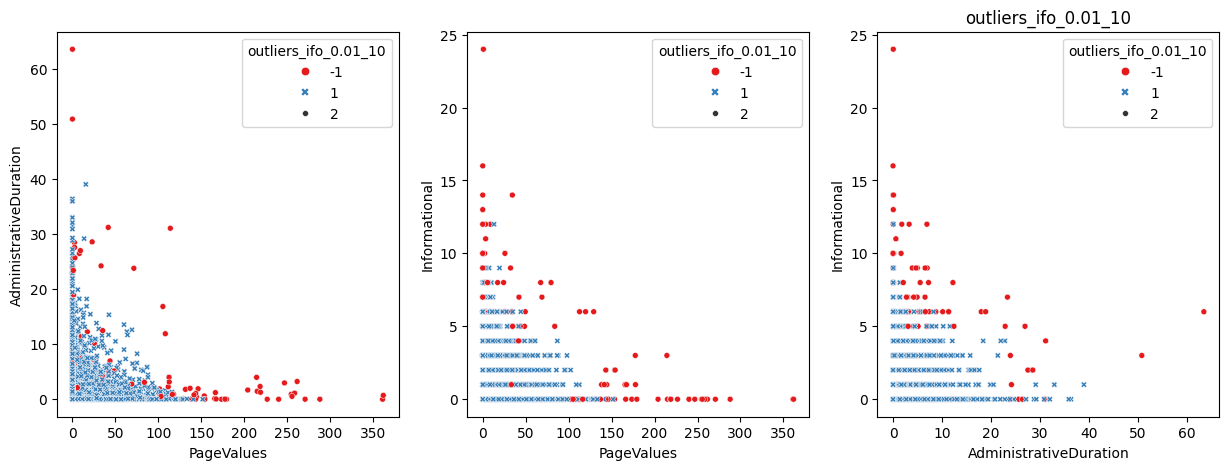

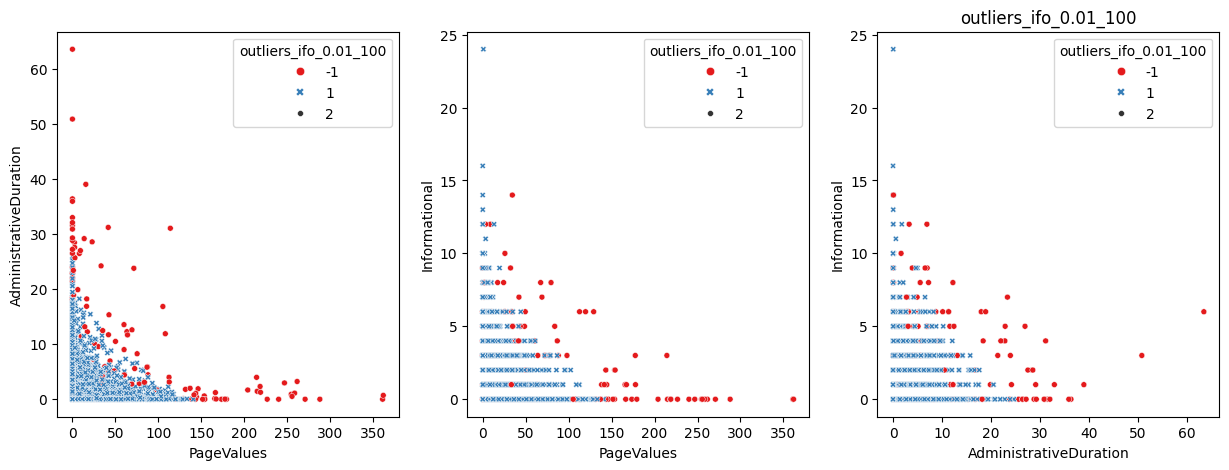

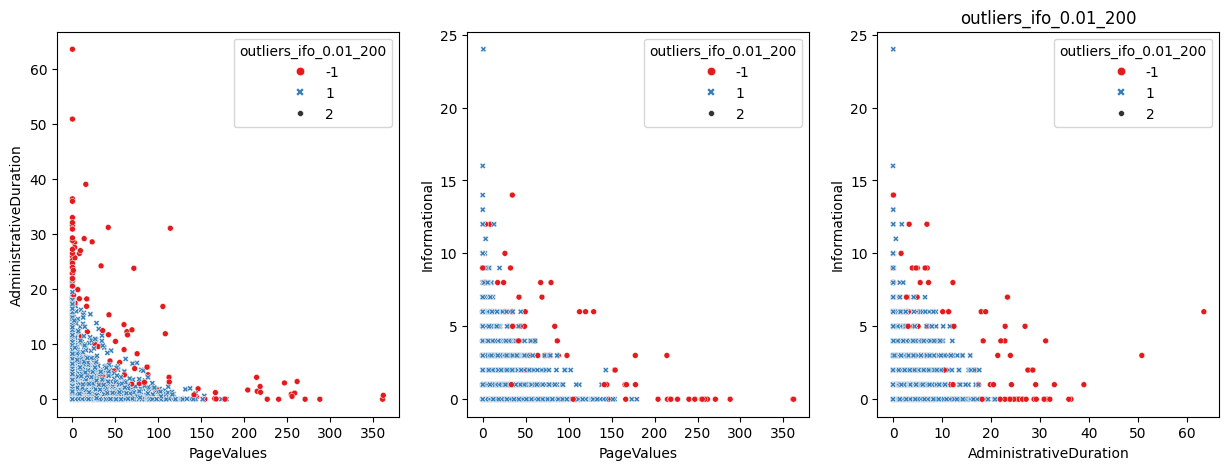

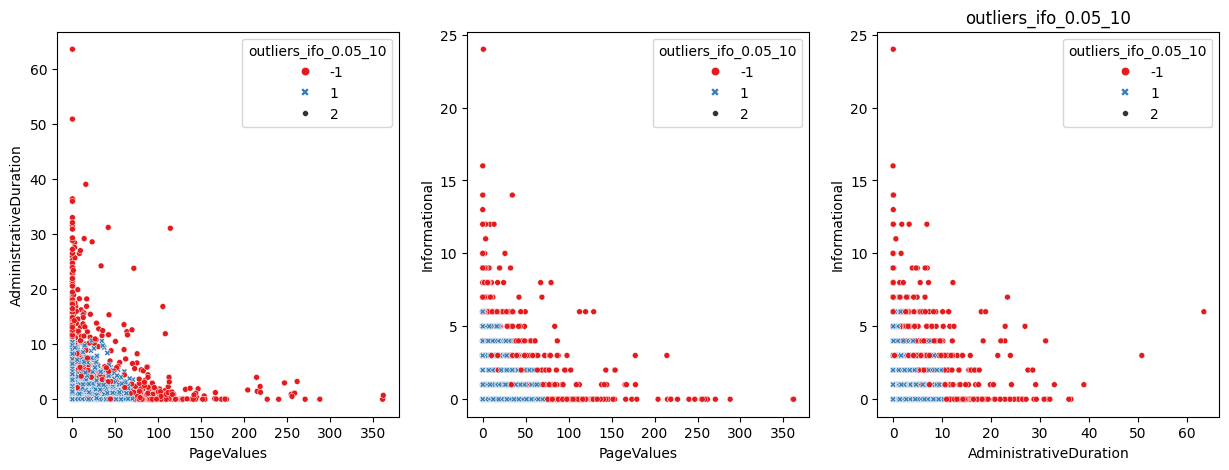

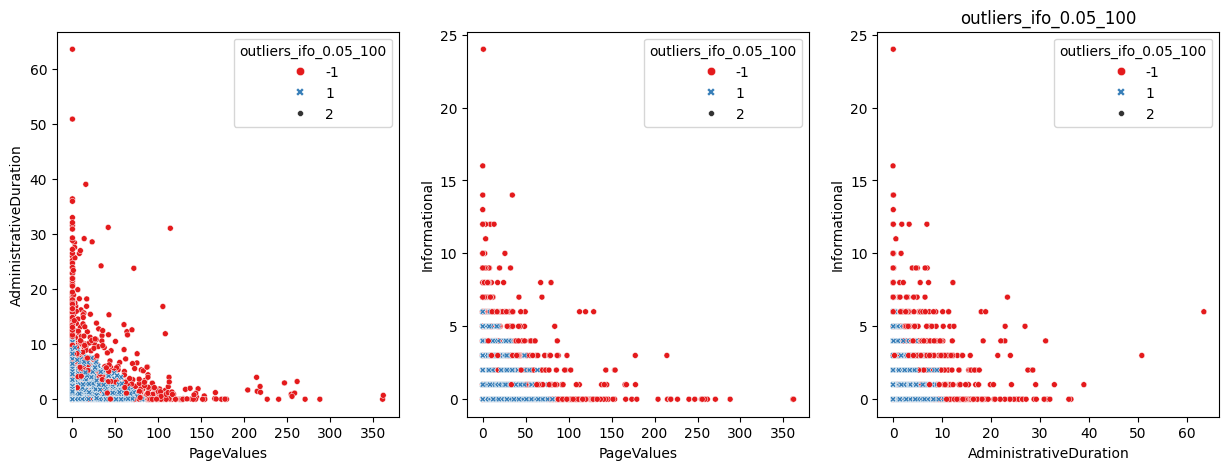

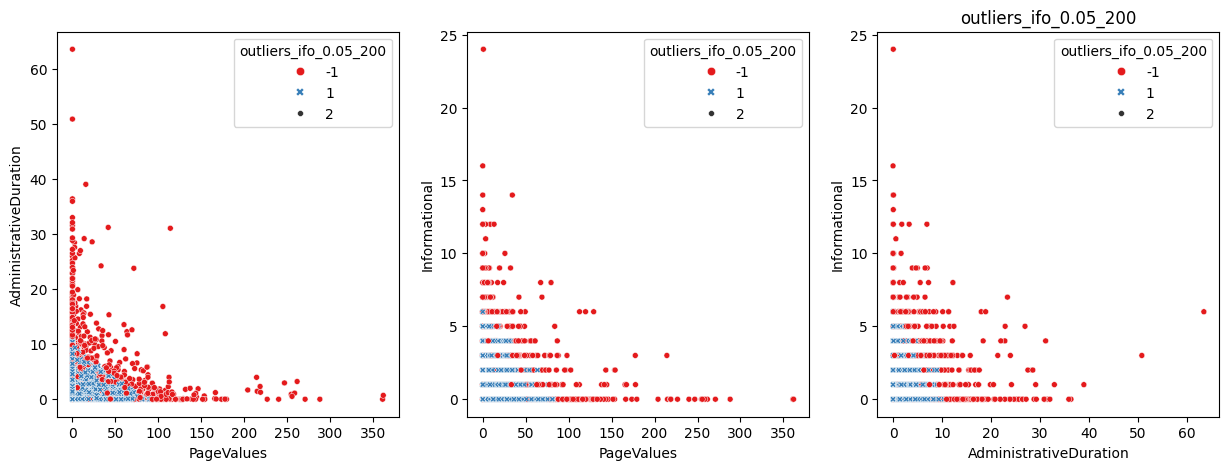

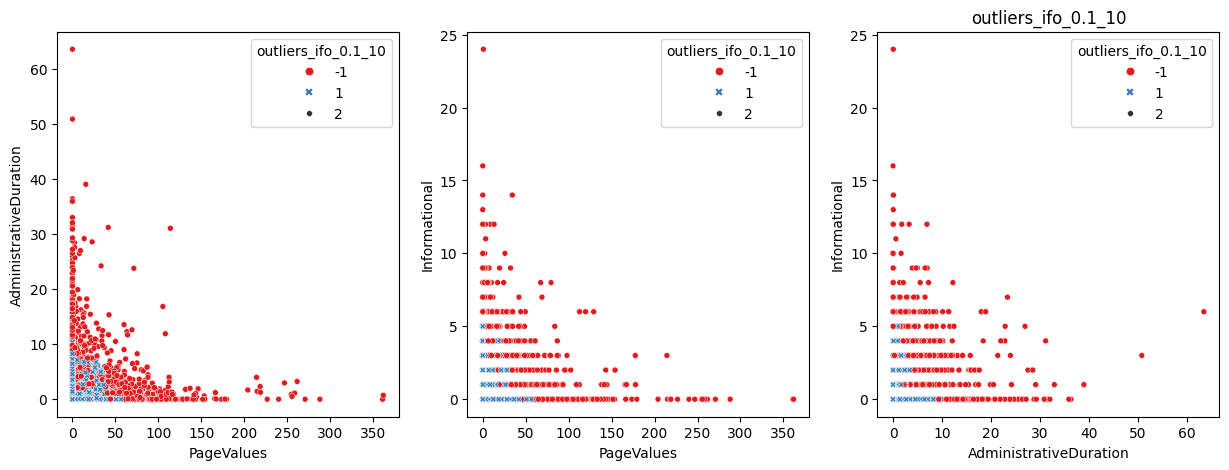

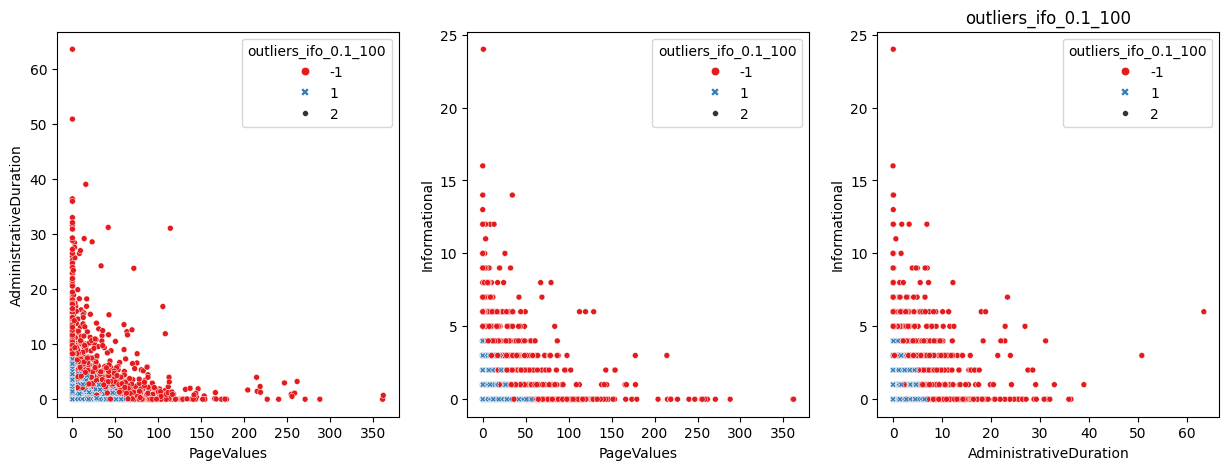

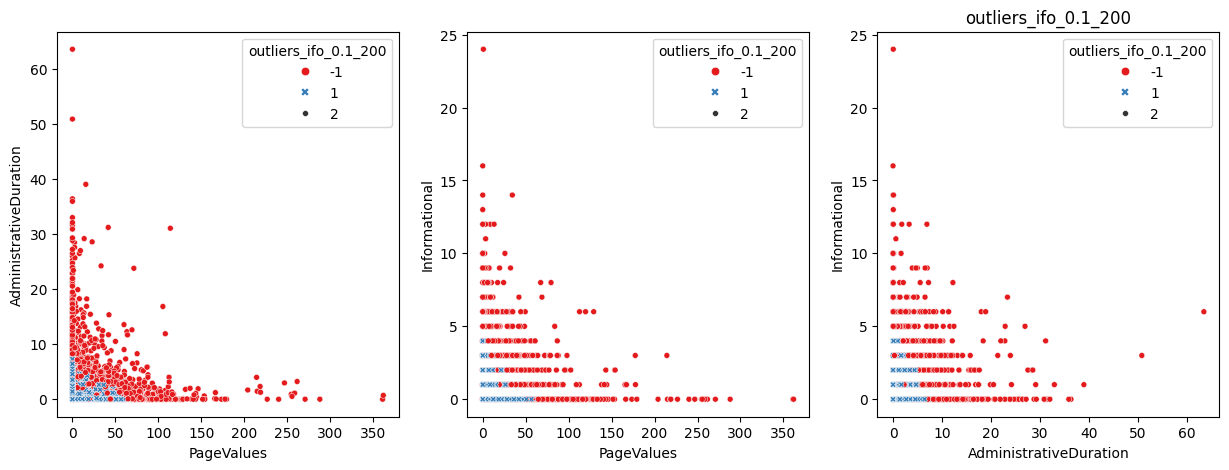

In [91]:
combinaciones_viz = list(combinations(['PageValues', 'AdministrativeDuration', 'Informational'], 2)) # hago combinaciones de 2
combinaciones_viz
for outlier in columnas_hue:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x=tupla[0],
                        y=tupla[1], 
                        ax=axes[indice],
                        data=df,
                        style=outlier,
                        size=2,
                        hue=outlier, #aqui miro todos mis graficos para ver cual me muestra los mejores OUTL
                        palette='Set1')
        
    plt.title(f'{outlier}')

In [93]:
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,...,BounceRates_knn,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,...,11.461524,1,1,1,1,1,1,1,1,1
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,Feb,Windows,Google Chrome,Region1,...,-0.221550,1,1,1,1,1,1,1,1,1
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,...,-0.221550,1,1,1,1,1,1,1,1,1
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,...,2.699218,1,1,1,1,1,1,1,1,1
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,Feb,Linux,Tor,Region1,...,0.946757,1,1,1,1,1,1,1,1,1
